In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing 

In [2]:
train = pd.read_csv(r'...Downloads\zomato.csv')

In [3]:
train.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [4]:
len(train)

51717

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [6]:
train.drop(["url", "address",  "phone"],axis = 1, inplace= True)

In [7]:
train.rename(columns = {'approx_cost(for two people)':'avg cost'},inplace = True)

In [8]:
train.shape

(51717, 14)

In [9]:
# Checking for missing values 
pd.DataFrame({'Column':[i for i in train.columns],
             'Count':train.isnull().sum().values,
            'Percentage':((train.isnull().sum().values/len(train))*100).round(2)
             })

,Column,Count,Percentage
0,name,0,0.00
1,online_order,0,0.00
2,book_table,0,0.00
3,rate,7775,15.03
4,votes,0,0.00
5,location,21,0.04
6,rest_type,227,0.44
7,dish_liked,28078,54.29
8,cuisines,45,0.09
9,avg cost,346,0.67


In [10]:
print(f'there are {train.name.nunique()} restaurants in {train.location.nunique()} locations')

there are 8792 restaurants in 93 locations


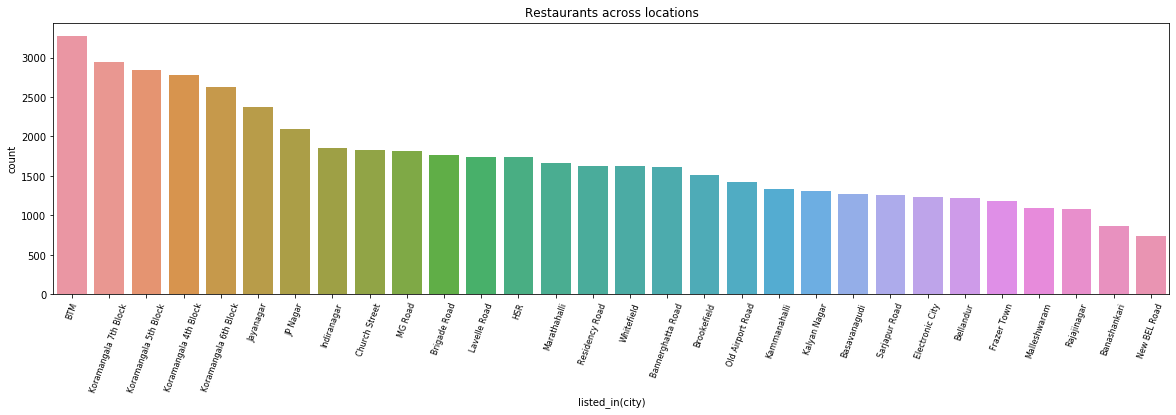

In [11]:
plt.figure(figsize = (20,5))
plt.title('Restaurants across locations')
plt.xticks(fontsize= 8, rotation= 70) 
sns.countplot(train['listed_in(city)'], order = train['listed_in(city)'].value_counts().index) # index gives the names

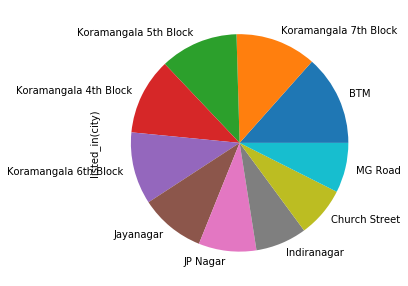

In [12]:
plt.figure (figsize = (5,5))
train['listed_in(city)'].value_counts()[:10].plot(kind = 'pie')

In [13]:
train['name'].value_counts()[:20]    # value_counts returns a series

Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Kanti Sweets         68
Petoo                66
Polar Bear           65
Baskin Robbins       64
Chef Baker's         62
Pizza Hut            62
Subway               60
KFC                  60
Domino's Pizza       60
Beijing Bites        60
Sweet Truth          60
McDonald's           59
Smoor                59
Chai Point           58
Faasos               57
Name: name, dtype: int64

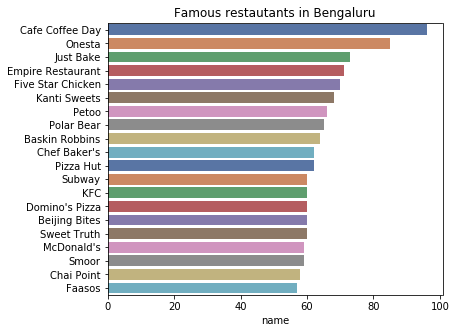

In [14]:
plt.figure(figsize = (6,5))
plt.title('Famous restautants in Bengaluru')
sns.barplot(train['name'].value_counts()[:20], train['name'].value_counts()[:20].index,palette='deep')

In [15]:
train['online_order'].value_counts()

Yes    30444
No     21273
Name: online_order, dtype: int64

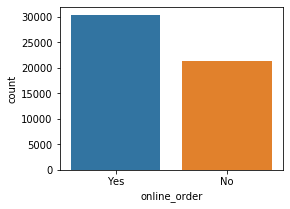

In [16]:
plt.figure(figsize = (4,3))
sns.countplot(train['online_order']) 

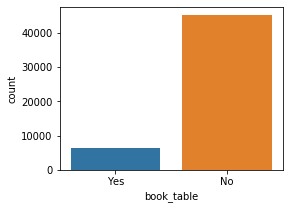

In [17]:
plt.figure(figsize = (4,3))
plt.xlabel('Booking available')
plt.ylabel('No.of Restaurants')
sns.countplot(train['book_table'])

In [18]:
train['listed_in(type)'].value_counts()    # we can also write like this for sorting sort_values(ascending=True) 

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: listed_in(type), dtype: int64

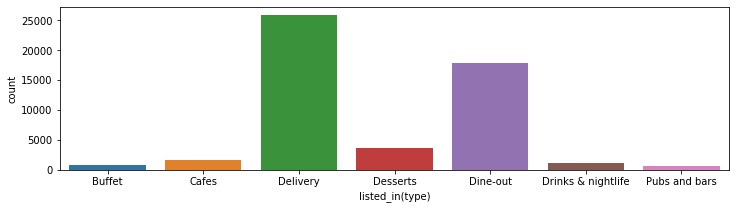

In [19]:
plt.figure(figsize = (12,3))
sns.countplot(train['listed_in(type)'])

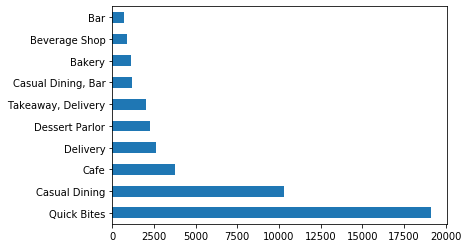

In [20]:
train['rest_type'].value_counts()[:10].plot(kind = 'barh')

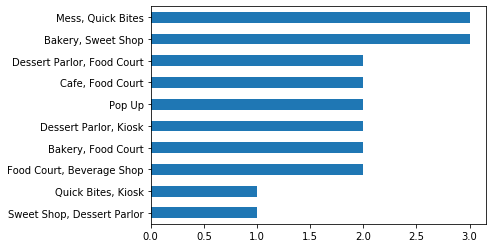

In [21]:
train['rest_type'].value_counts().nsmallest(10).plot(kind = 'barh')   # nsmallest for last 10 of the series

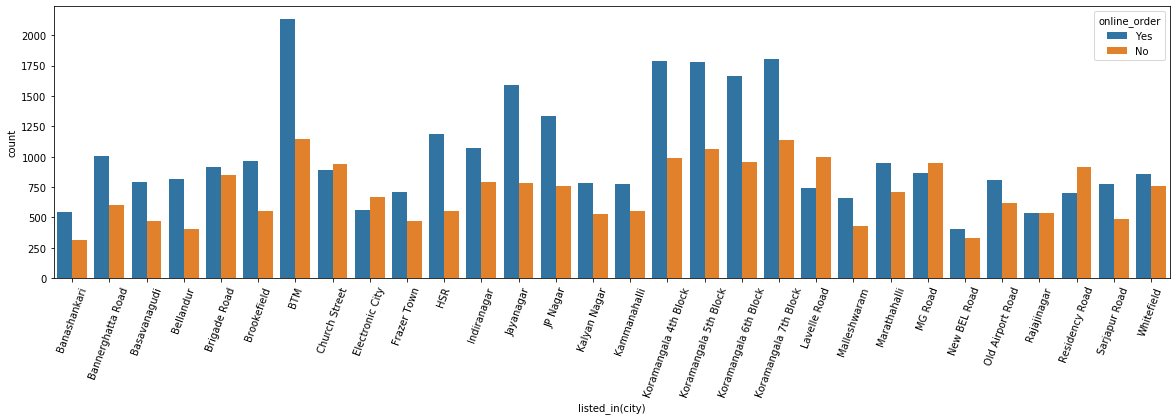

In [22]:
plt.figure(figsize = (20,5))
plt.xticks(fontsize= 10, rotation= 70) 
sns.countplot(train['listed_in(city)'], hue = train['online_order'])

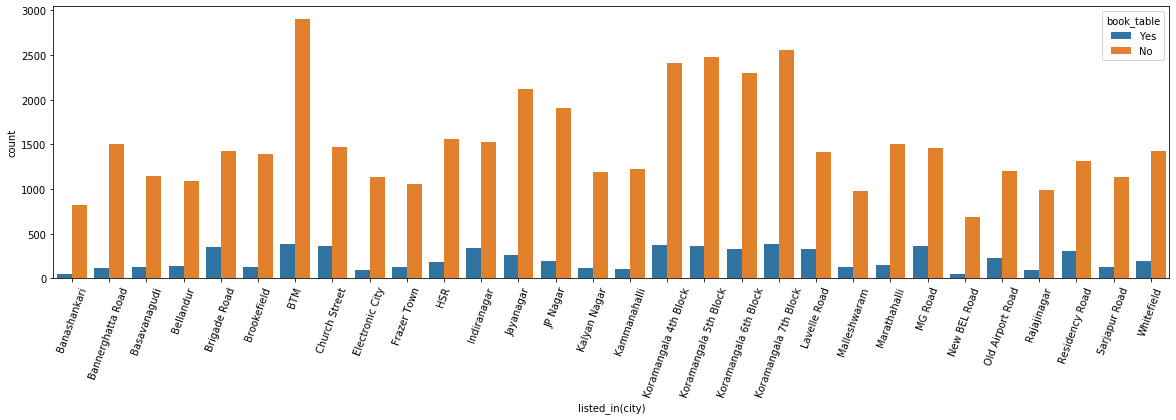

In [23]:
plt.figure(figsize = (20,5))
plt.xticks(fontsize= 10, rotation= 70) 
sns.countplot(train['listed_in(city)'], hue = train['book_table'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

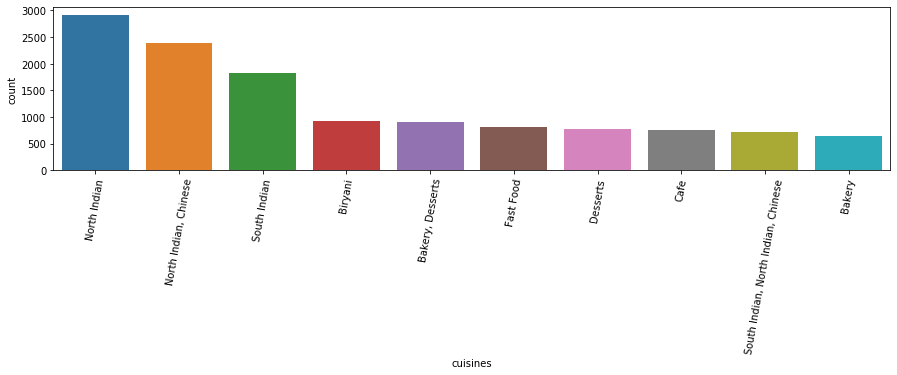

In [24]:
# another way of using count plot
plt.figure(figsize = (15,3))
sns.countplot(data = train, x = 'cuisines', order = train['cuisines'].value_counts()[: 10].index) 
plt.xticks(rotation = 80)

In [25]:
train['rate'] = train['rate'].str.replace('/5','')
train['rate'] = train['rate'].replace('NEW',np.NaN)
train['rate'] = train['rate'].replace('-',np.NaN)
train['rate'] = train['rate'].str.replace(' ','')
train.dropna(how = 'any', inplace = True)    # returns a new dataframe, inplace = True for changing in existing dataframe, 
# how = any  drops all rows with NaN in any of the columns

In [26]:
train['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.2', '4.5',
       '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3', '4.8',
       '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [27]:
train['rate'].value_counts()[:20]

3.9    3250
4.0    2903
4.1    2830
3.8    2484
4.2    2125
4.3    1681
3.7    1646
4.4    1142
3.6     878
4.5     648
3.5     482
3.4     351
2.8     321
2.9     313
3.1     307
4.6     300
3.0     291
3.2     250
3.3     219
2.7     190
Name: rate, dtype: int64

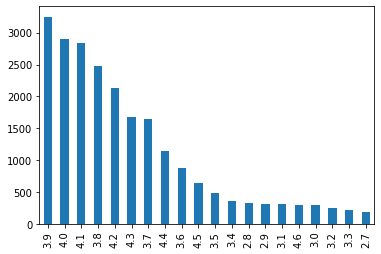

In [28]:
train['rate'].value_counts()[:20].plot(kind = 'bar')

<Figure size 1440x216 with 0 Axes>

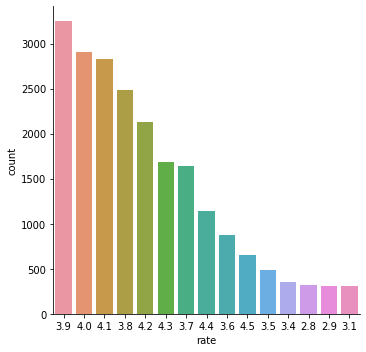

In [29]:
# count plot for categorical values
plt.figure(figsize = (20,3))
sns.catplot(data = train , kind = 'count', x = 'rate', order = train['rate'].value_counts()[:15].index) 

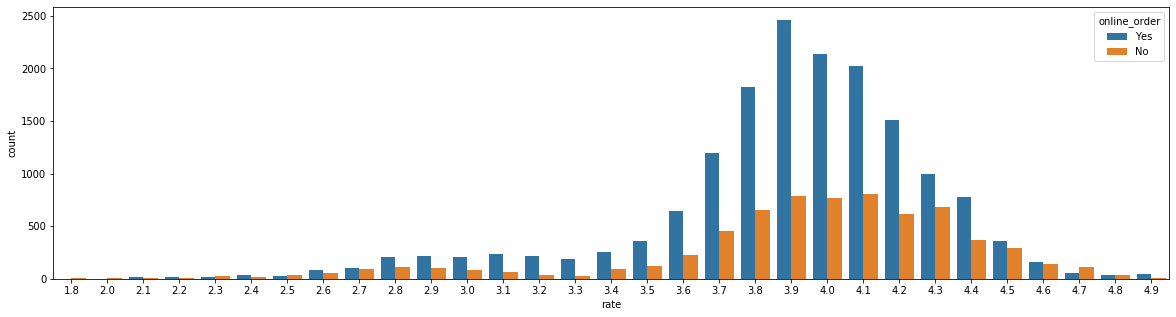

In [30]:
plt.figure(figsize = (20,5))
sns.countplot(x= train['rate'], hue = train['online_order'])

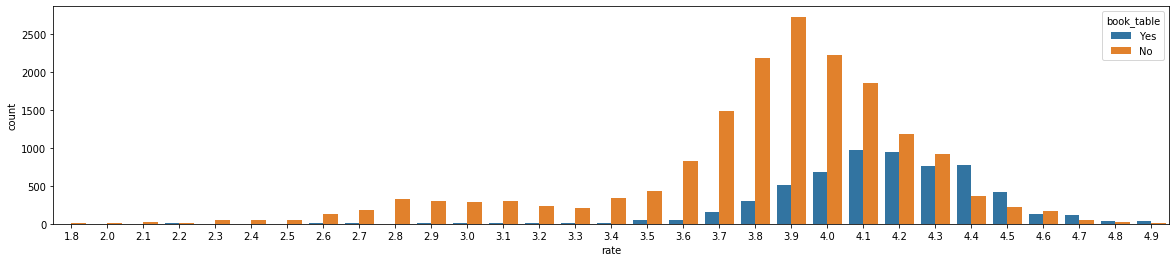

In [31]:
plt.figure(figsize = (20,4))
sns.countplot( train.rate, hue = train.book_table )

In [32]:
city_track = train['listed_in(city)'].value_counts()

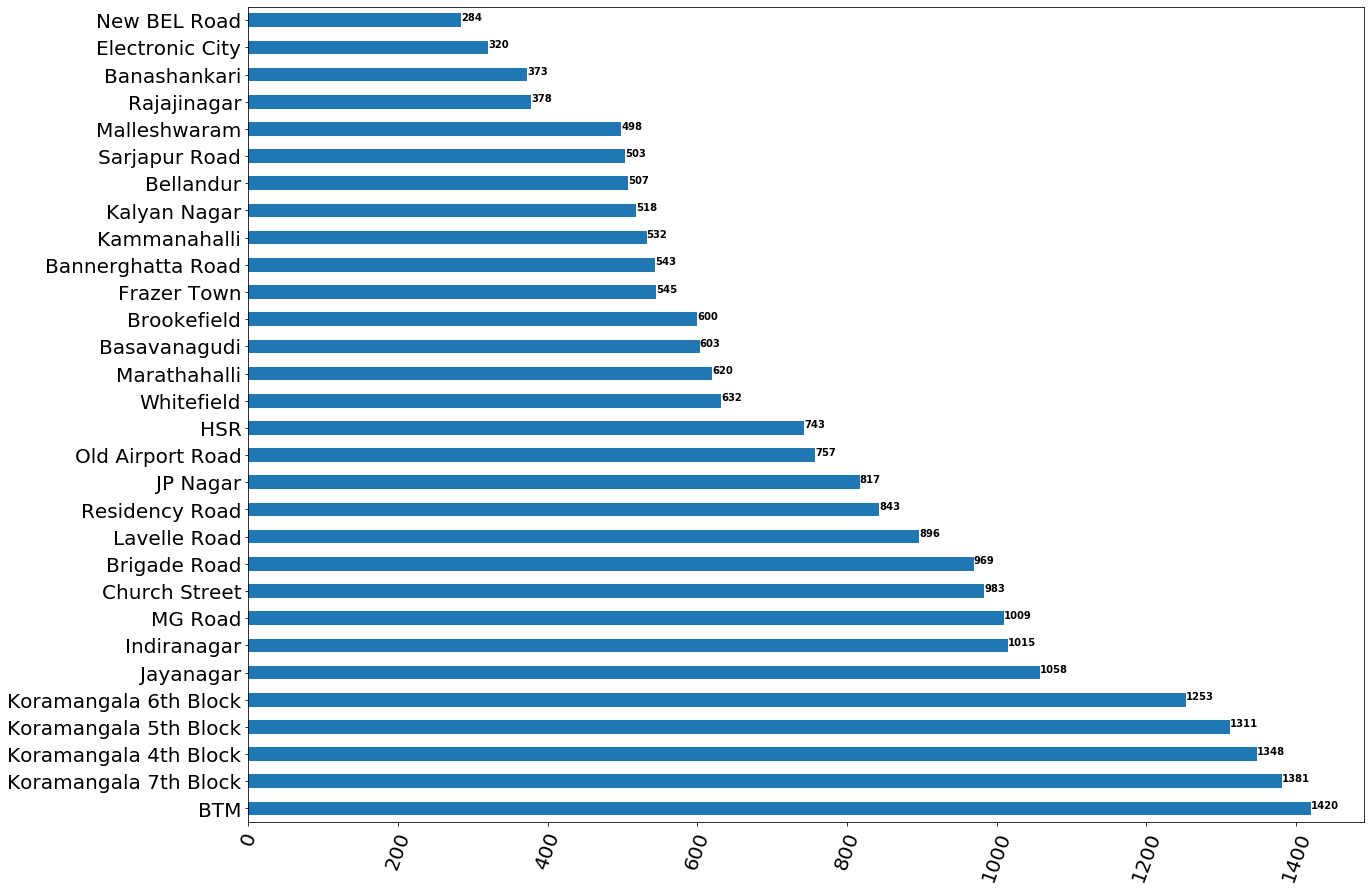

In [33]:
plt.figure(figsize = (20,15))
plt.xticks(fontsize= 8, rotation= 70) 
city_track.plot(kind="barh",fontsize=20)
for v in range(len(city_track)):
    plt.text (city_track[v],v,city_track[v],fontsize=10,color="BLACK",fontweight='bold')

In [34]:
# Cleaning using split and adding it to a dictionary
cuisines = []
for i in train['cuisines']:
    for j in i.split(', '):
        cuisines.append(j)                   # .append to be used to add in a dictionary

In [35]:
# all mughlai serving restaurants
mughlai_place = train[train['cuisines'].str.contains('Mughlai',case = False, na = False)]

In [36]:
#single and multi cuisine restaurants
multi_cuisine = train[train['cuisines'].str.contains(',')]
single_cuisine = train[train['cuisines'].str.contains(',')== False]

In [37]:
dish_liked = []
for i in train['dish_liked']:
    for j in i.split(', '):
        dish_liked.append(j)

In [38]:
pd.Series(dish_liked).value_counts().iloc[:10]    # value_counts works only on series

Pasta         3352
Burgers       2994
Cocktails     2773
Pizza         2664
Biryani       2058
Coffee        1985
Mocktails     1854
Sandwiches    1657
Paratha       1530
Salads        1389
dtype: int64

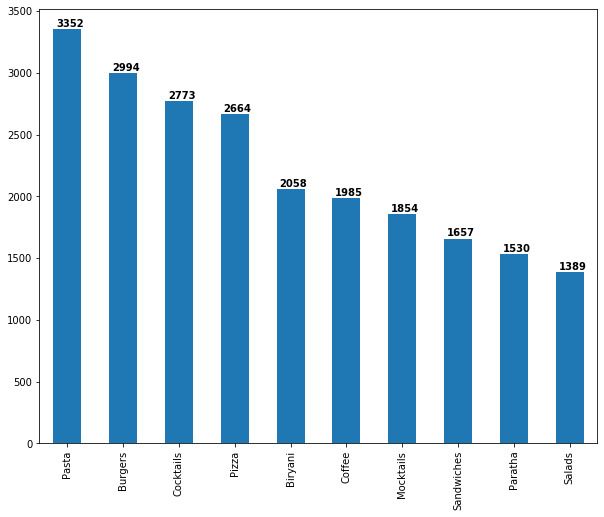

In [55]:
dishes = pd.Series(dish_liked).value_counts().iloc[:10]
plt.figure(figsize = (10,8))
dishes.plot(kind = 'bar') 

for v in range(len(dishes)):
    plt.text (v-0.2,dishes[v]+20,dishes[v],fontsize=10,color="BLACK",fontweight='bold')

In [58]:
train['avg cost'].shape

(23259,)

In [61]:
train['avg cost'] = train['avg cost'].apply(lambda x: str(x).replace(',',''))
train['avg cost'] = train['avg cost'].astype(float)

In [63]:
train['avg cost'].value_counts().iloc[:10]  # iloc to be used in case of float variable

400.0     2480
500.0     2321
600.0     2168
300.0     1689
800.0     1647
1000.0    1218
700.0     1202
1200.0     905
200.0      870
1500.0     841
Name: avg cost, dtype: int64

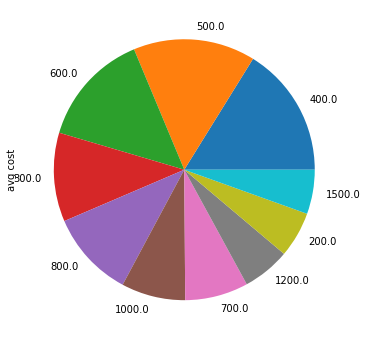

In [65]:
plt.figure(figsize =(8,6))
train['avg cost'].value_counts().iloc[:10].plot(kind = 'pie') 

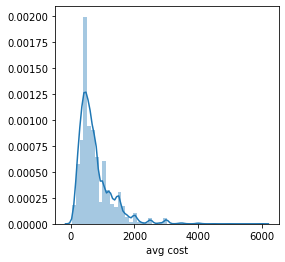

In [66]:
plt.figure(figsize = (4,4))
sns.distplot(train['avg cost'])

In [8]:
import pandas_profiling  
pandas_profiling.ProfileReport(train) 

Number of variables,17
Number of observations,51717
Total Missing (%),4.3%
Total size in memory,6.7 MiB
Average record size in memory,136.0 B
Numeric,1
Categorical,15
Boolean,0
Date,0
Text (Unique),1
Rejected,0
